## Artificial Neuron

The artificial neuron, aka unit, is the building block of Deep Learning Networks for computer vision. With a biological inspiration on brain neurons, it is a simple computational unit that is commonly grouped in layers to create neural networks. 

A simplified view of the brain neuron is presented in the following figure ([credit](https://pixabay.com/vectors/neuron-nerve-cell-axon-dendrite-296581/))

<div align="center">
 <img src="images/neuron.png" >
</div>

A very simplified description of the neurons inner workings is as follows: the neuron receives its input through the dendrites, synapses carry the input to the cell's body (soma). The soma processes the inputs and produces an output that is carried through the axon. At the end of the axon we can find dendrites from other cells.

<div align="center">
 <img src="images/artificial_neuron.png" >
</div>

Similarly, the artifical neuron was inputs (dendrites). The connections between the inputs and the neuron are called weights (synapses). The weighted input is summed and post processed with an activation function $f$ (soma processing). The post processed output is then made available to other neurons (axon).

In the field of deep learning several activation functions have been proposed, in here we cover some of the most common ones.

## Activation functions

### Sigmoid or logistic function

$f(x) = \large \frac{1}{1+e^{-x}}$

output range: $]0,1[$

Due to its output range it can be interpreted as a probability.

$f'(x) = f(x) (1 - f(x))$


In [1]:
import math
from matplotlib import pyplot as plt
import numpy as np

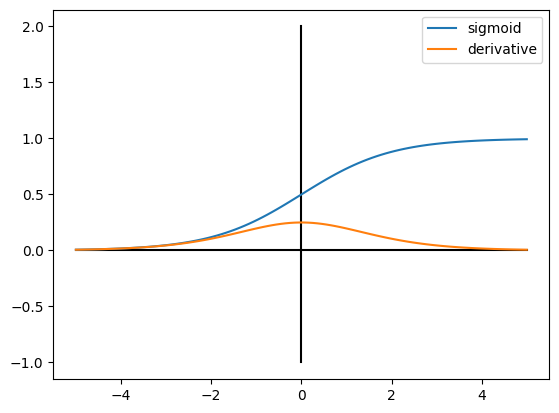

In [2]:
xx = np.linspace(-5, 5, 100)

y = [1/(1+math.exp(-x)) for x in xx]
dy = [k*(1-k) for k in y ]

plt.plot((-5,5),(0,0), color='black')
plt.plot((0,0),(-1,2), color='black')
plt.plot(xx,y, label='sigmoid')
plt.plot(xx,dy, label = 'derivative')
plt.legend()



### Hyperbolic Tangent

$f(x) = tanh(x)$

output range: $]-1,1[$

Both $sigmoid$ and $tanh$ are S shape functions, the main difference being in the output range. The  advantage is that $tanh$ provides zero centered outputs due to its output range. Furthermore, $tanh$ has a steeper gradient compared to the sigmoid.

$f'(x) = 1 - f(x)^2$

The derivative exposes the main issue with both these functions. As the absolute value of $x$ increases the derivatives are going to get smaller and smaller.  As the weight updates are proportional to the derivatives, this implies that very small updates will be applied for these weights.

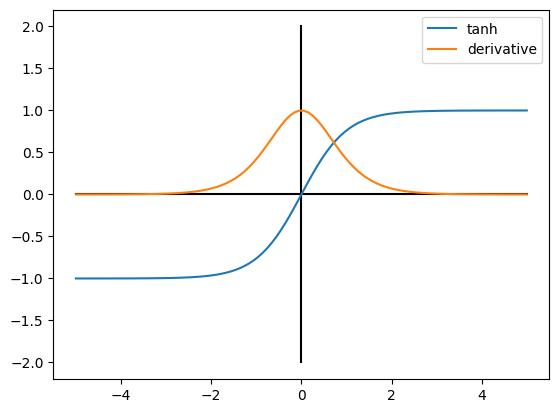

In [3]:
xx = np.linspace(-5, 5, 100)

y = [math.tanh(x) for x in xx]
dy = [1-k*k for k in y]

plt.plot((-5,5),(0,0), color='black')
plt.plot((0,0),(-2,2), color='black')
plt.plot(xx,y, label ='tanh')
plt.plot(xx,dy, label = 'derivative')
plt.legend()

### ReLU: Rectified Linear Unit.

This is the most common activation function nowadays. It is also probably the simplest activation function. Being piecewise linear makes its computation efficient and it has provided consistently good results in CNNs.

Both sigmoid and tanh functions have shallow derivatives when the absolute value of the input is very large. ReLU does not suffer from that problem for positive inputs, having a constant derivative.

$f(x)  = max(x, 0)$

output range: $[0, +\infty]$

$f'(x) = \begin{cases}0  & \text{ if x < 0 }\\ 1 & \text{ if x >= 0 }\end{cases}$

The main issue with this function is that it sets to zero all negative inputs. The derivative will also be zero, implying that some weights and biases will not be updated. Still, as mentioned before, in practice it produces good results.

Ref: Vinod Nair, Geoffrey E. Hinton,*Rectified Linear Units Improve Restricted Boltzmann Machines* [PDF](https://www.cs.toronto.edu/~fritz/absps/reluICML.pdf)

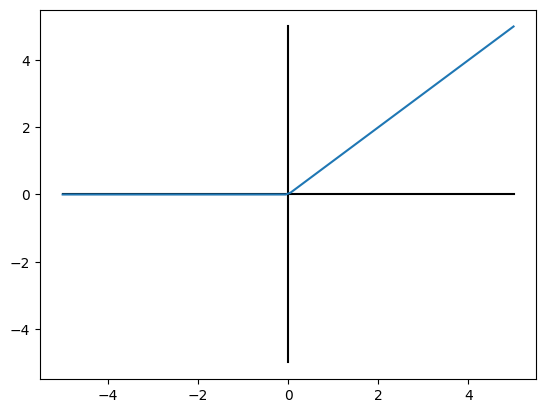

In [4]:
y = [max(k,0) for k in xx]


plt.plot((-5,5),(0,0), color='black')
plt.plot((0,0),(-5,5), color='black')
plt.plot(xx,y)

### Leaky ReLU

Leaky ReLU is a modification of the ReLU function, where negative values are multiplied by a small constant instead of being set to zero.

$f(x) = \begin{cases} \alpha x, & \text{if}\ x < 0 \\ x, & \text{otherwise} \\ \end{cases}$


$f'(x) = \begin{cases}\alpha  & \text{ if x < 0 }\\ 1 & \text{ if x >= 0 }\end{cases}$


Tipically $a$ is set to a small value. TensorFlow uses $\alpha=0.3$ as default, whereas Pytorch uses $0.1$.

Ref: Andrew L. Maas, Awni Y. Hannun, Andrew Y. Ng, *Rectifier Nonlinearities Improve Neural Network Acoustic Models* [PDF](https://ai.stanford.edu/~amaas/papers/relu_hybrid_icml2013_final.pdf)

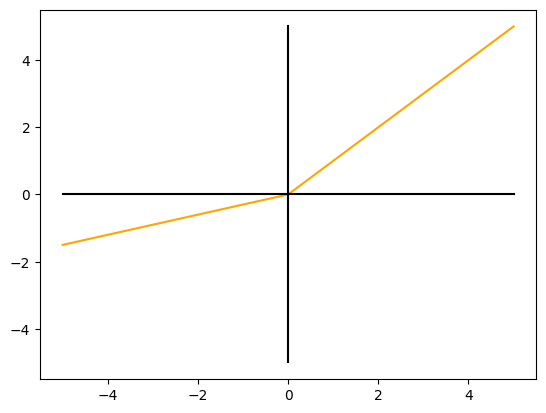

In [5]:
a = 0.3 # default value in tensorflow
y = [k if k > 0 else a*k for k in xx]


plt.plot(xx,y, color='orange')
plt.plot((-5,5),(0,0), color='black')
plt.plot((0,0),(-5,5), color='black')

### Swish or SILU

A product of the identity function and the sigmoid function

$f(x) = x \beta \large \frac{1}{1+e^{-x}}$

In tensorflow and pytorch $\beta = 1$

Ref: Prajit Ramachandran, Barret Zoph, Quoc V. Le, *Searching for Activation Functions* [PDF](https://arxiv.org/abs/1710.05941)


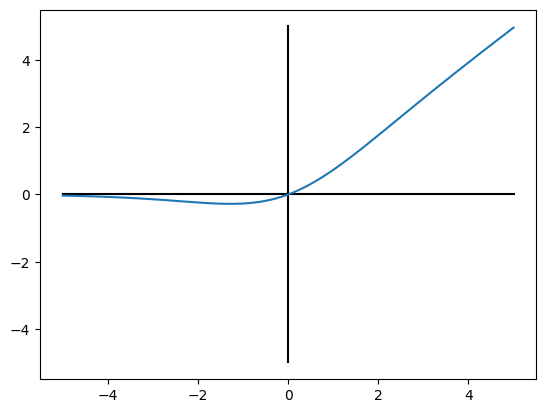

In [6]:
xx = np.linspace(-5, 5, 100)

y = [x * 1/(1+math.exp(-x)) for x in xx]

plt.plot((-5,5),(0,0), color='black')
plt.plot((0,0),(-5,5), color='black')
plt.plot(xx,y)